In [1]:
import numpy as np
from PIL import Image
import glob
import re

In [2]:
IMGS_DIR = "character_imgs/ascii/CascadiaMono/"

In [3]:
img = Image.open(IMGS_DIR + "100.bmp")
img_arr = np.array(img)

img_size = img_arr.size
img_shape = img_arr.shape

print(img_size, img_shape)
print(np.split(img_arr, 2)[0].shape)
img

288 (24, 12)
(12, 12)


In [4]:
img_ls = glob.glob(IMGS_DIR + "*.bmp")
char_ls = {}
for i in range(0, len(img_ls)):
    img = Image.open(img_ls[i])
    img = np.array(img)
    img_top_bottom = np.split(img, 2)
    char_ls[chr(int(re.findall(r'\d+', img_ls[i])[0]))] = (
                (img.size // 2 - np.count_nonzero(img_top_bottom[0])) / (img.size / 2),
                (img.size // 2 - np.count_nonzero(img_top_bottom[1])) / (img.size / 2))


In [5]:
brightness_ls = sorted(list(char_ls.items()), key=lambda a: (a[1][0], a[1][1]))

print(brightness_ls)

[(' ', (0.0, 0.0)), ('.', (0.0, 0.04861111111111111)), (',', (0.0, 0.09722222222222222)), ('_', (0.0, 0.1388888888888889)), (':', (0.04861111111111111, 0.04861111111111111)), (';', (0.04861111111111111, 0.09722222222222222)), ('`', (0.06944444444444445, 0.0)), ('-', (0.06944444444444445, 0.06944444444444445)), ("'", (0.08333333333333333, 0.0)), ('y', (0.08333333333333333, 0.3055555555555556)), ('~', (0.09027777777777778, 0.09027777777777778)), ('v', (0.09027777777777778, 0.2013888888888889)), ('!', (0.09722222222222222, 0.0763888888888889)), ('x', (0.09722222222222222, 0.19444444444444445)), ('L', (0.09722222222222222, 0.19444444444444445)), ('a', (0.09722222222222222, 0.3125)), ('u', (0.10416666666666667, 0.2777777777777778)), ('e', (0.10416666666666667, 0.2916666666666667)), ('<', (0.1111111111111111, 0.1111111111111111)), ('o', (0.1111111111111111, 0.25)), ('c', (0.11805555555555555, 0.18055555555555555)), ('s', (0.11805555555555555, 0.2222222222222222)), ('+', (0.125, 0.125)), ('>'

In [6]:
import matplotlib.pyplot as plt

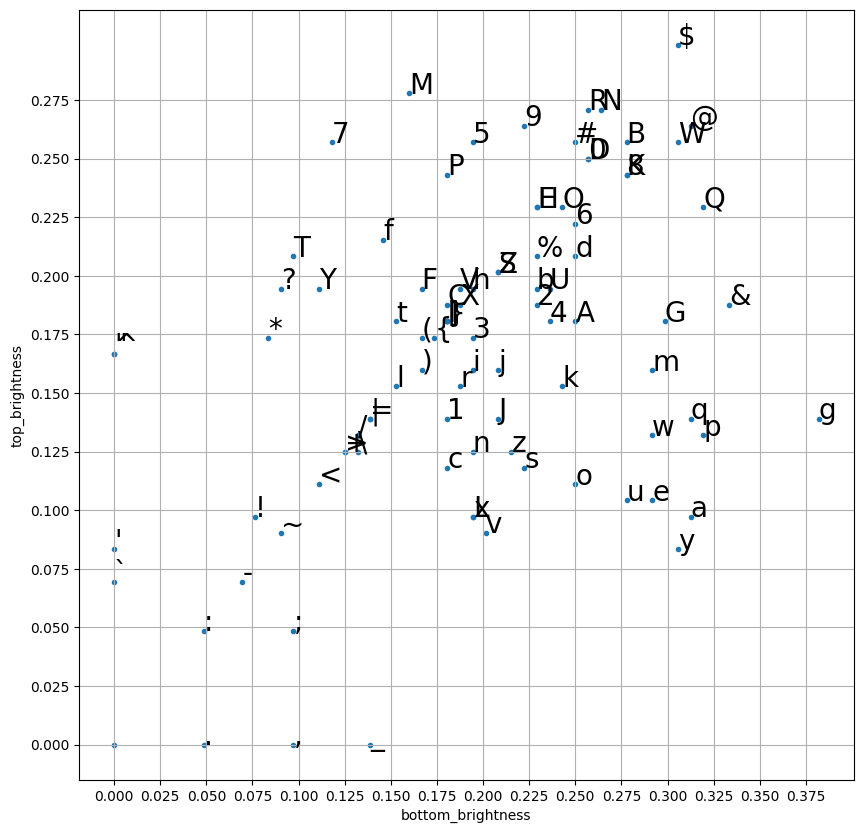

In [7]:
plt.figure(figsize=(10, 10))
top_brightness = [a[1][0] for a in brightness_ls]
bottom_brightness = [a[1][1] for a in brightness_ls]
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness), 0.025))
plt.yticks(np.arange(min(top_brightness), max(top_brightness), 0.025))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(char_ls)):
    plt.annotate(brightness_ls[i][0], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [8]:
y_dim = 10
x_dim = 10
brightness_arr = [[''] * x_dim for _ in range(y_dim)]

n_top_brightness = list(map(lambda b: b / max(top_brightness), top_brightness))
n_bottom_brightness = list(map(lambda b: b / max(bottom_brightness), bottom_brightness))

char_to_n_bt_brightness = {}
for b in zip(brightness_ls, n_top_brightness, n_bottom_brightness):
    char_to_n_bt_brightness[b[0][0]] = (b[1], b[2], (b[1] + b[2]) / 2)

for c, b in char_to_n_bt_brightness.items():
    brightness_arr[int(b[0] * (y_dim - 1))][int(b[1] * (x_dim - 1))] += c

for row in brightness_arr:
    print(row)

[' ', '.', ',', '_', '', '', '', '', '', '']
['', ':', ';', '', '', '', '', '', '', '']
["`'", '-!', '~', '', 'vxL', '', '', 'ya', '', '']
['', '', '<+>', '\\/', 'cn', 'osz', 'uew', 'p', '', '']
['', '', '', '|=l)', '1Jrij', 'k', 'm', 'q', '', 'g']
['"^', '*', '?Y', '(tF', '{3}I[]CXVh', '4A2bU', '', 'G&', '', '']
['', '', 'T', 'f', 'SZ', '%d6EHO', '', 'Q', '', '']
['', '', '7', '', 'P5', '#9', '8K0DB', 'W@', '', '']
['', '', '', 'M', '', '', 'RN', '', '', '']
['', '', '', '', '', '', '', '$', '', '']


In [9]:
def splice_cell(top, left):
    res = top[0]
    for a in top:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a

    for a in left:
        if (char_to_n_bt_brightness[res][2] < char_to_n_bt_brightness[a][2]):
            res = a
    return res


for y in range(y_dim):
    for x in range(x_dim):
        if brightness_arr[y][x] == '':
            if x > 0 and y > 0:
                brightness_arr[y][x] += splice_cell(brightness_arr[y-1][x], brightness_arr[y][x-1])
            elif x > 0:
                brightness_arr[y][x] += brightness_arr[y][x - 1][-1]
            elif y > 0:
                brightness_arr[y][x] += brightness_arr[y - 1][x][-1]
            brightness_arr[y][x] = ''.join(set(brightness_arr[y][x]))

for row in brightness_arr:
    print(row)

[' ', '.', ',', '_', '_', '_', '_', '_', '_', '_']
[' ', ':', ';', ';', ';', ';', ';', ';', ';', ';']
["`'", '-!', '~', '~', 'vxL', 'x', 'x', 'ya', 'a', 'a']
["'", '!', '<+>', '\\/', 'cn', 'osz', 'uew', 'p', 'p', 'p']
["'", '!', '+', '|=l)', '1Jrij', 'k', 'm', 'q', 'q', 'g']
['"^', '*', '?Y', '(tF', '{3}I[]CXVh', '4A2bU', 'm', 'G&', '&', '&']
['^', '*', 'T', 'f', 'SZ', '%d6EHO', 'O', 'Q', 'Q', 'Q']
['^', '*', '7', '7', 'P5', '#9', '8K0DB', 'W@', '@', '@']
['^', '*', '7', 'M', '5', '#', 'RN', '@', '@', '@']
['^', '*', '7', 'M', '5', '#', 'N', '$', '$', '$']


In [10]:
for y in range(y_dim):
    for x in range(x_dim):
        num_chars = len(brightness_arr[y][x])
        if num_chars > 1:
            brightness_arr[y][x] = brightness_arr[y][x][num_chars // 2 - 1]

b_set = set()
for row in brightness_arr:
    b_set = b_set.union(set(row))
    print(' '.join(row))

print(len(b_set))

  . , _ _ _ _ _ _ _
  : ; ; ; ; ; ; ; ;
` - ~ ~ v x x y a a
' ! < \ c o u p p p
' ! + = J k m q q g
" * ? ( [ A m G & &
^ * T f S 6 O Q Q Q
^ * 7 7 P # K W @ @
^ * 7 M 5 # R @ @ @
^ * 7 M 5 # N $ $ $
54


In [11]:
b_list = []
for c in b_set:
    b_list.append((c, char_ls.get(c)))

b_list.sort(key=lambda a: (a[1][0], a[1][1]))
print(b_list)

[(' ', (0.0, 0.0)), ('.', (0.0, 0.04861111111111111)), (',', (0.0, 0.09722222222222222)), ('_', (0.0, 0.1388888888888889)), (':', (0.04861111111111111, 0.04861111111111111)), (';', (0.04861111111111111, 0.09722222222222222)), ('`', (0.06944444444444445, 0.0)), ('-', (0.06944444444444445, 0.06944444444444445)), ("'", (0.08333333333333333, 0.0)), ('y', (0.08333333333333333, 0.3055555555555556)), ('~', (0.09027777777777778, 0.09027777777777778)), ('v', (0.09027777777777778, 0.2013888888888889)), ('!', (0.09722222222222222, 0.0763888888888889)), ('x', (0.09722222222222222, 0.19444444444444445)), ('a', (0.09722222222222222, 0.3125)), ('u', (0.10416666666666667, 0.2777777777777778)), ('<', (0.1111111111111111, 0.1111111111111111)), ('o', (0.1111111111111111, 0.25)), ('c', (0.11805555555555555, 0.18055555555555555)), ('+', (0.125, 0.125)), ('\\', (0.125, 0.13194444444444445)), ('p', (0.13194444444444445, 0.3194444444444444)), ('=', (0.1388888888888889, 0.1388888888888889)), ('J', (0.138888888

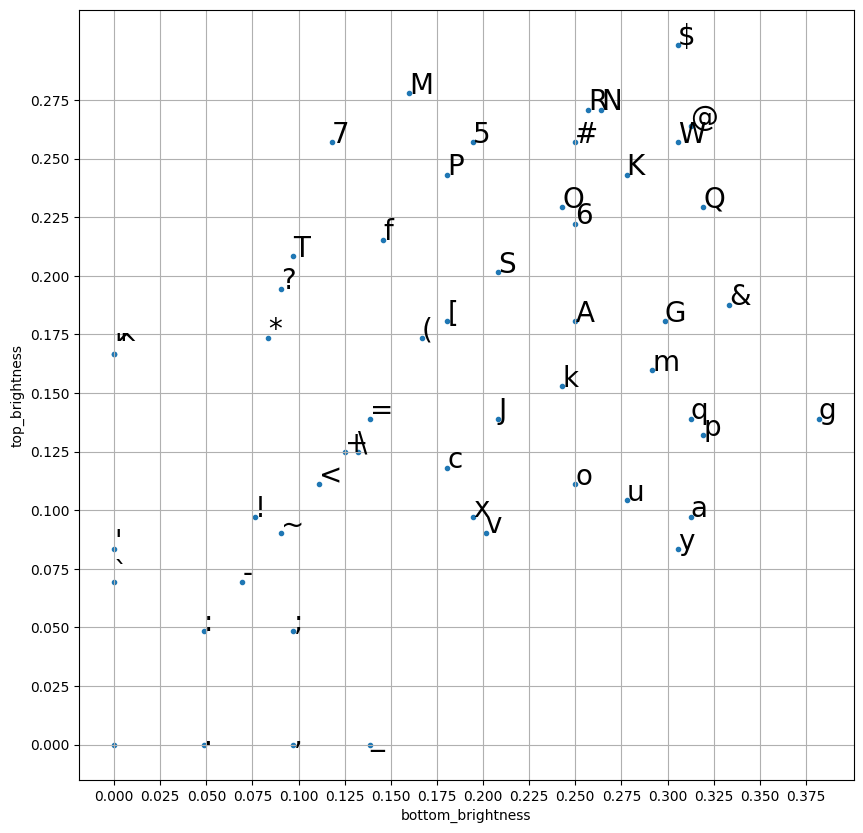

In [12]:
plt.figure(figsize=(10, 10))
b_top_brightness = [a[1][0] for a in b_list]
b_bottom_brightness = [a[1][1] for a in b_list]
plt.scatter(b_bottom_brightness, b_top_brightness, marker='.')
plt.xticks(np.arange(min(b_bottom_brightness), max(b_bottom_brightness), 0.025))
plt.yticks(np.arange(min(b_top_brightness), max(b_top_brightness), 0.025))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(b_list)):
    plt.annotate(b_list[i][0], (b_bottom_brightness[i], b_top_brightness[i]), size=20)
plt.grid()